# 1.4 Método de la *secante*

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/caramirezs/MetNum_202210/blob/main/1_Ecuaciones_de_una_variable/1.4_Metodo_de_la_secante.ipynb)

In [2]:
import math
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

## Funciones en python

In [1]:

def graficar(f, x_i, x_f, num=1000):
        plt.style.use('seaborn')
        plt.ion()
        """
        Gráfica de funciones algebraicas
        :param f: función, previamente definida
        :param x_i: límite inferior del intervalo
        :param x_f: límite superior del intervalo
        :param num: división del intervalo
        :return: gráfica de la función
        """
        x = np.linspace(x_i, x_f, num)
        fig, ax = plt.subplots(figsize=(20, 8))
        ax.plot(x, f(x))
        xmin, xmax = ax.get_xlim()
        ymin, ymax = ax.get_ylim()
        ax.annotate("", xy=(xmax, 0), xytext=(xmin, 0), arrowprops=dict(color='gray', width=1.5, headwidth=8, headlength=10))
        ax.annotate("", xy=(0, ymax), xytext=(0, ymin), arrowprops=dict(color='gray', width=1.5, headwidth=8, headlength=10))
        #plt.show()
        
        return None
    
def met_secante(f, p_m, p_n, tol=1e-4, n=50, verbose=True, print_error=False, deploy_error=False):
        """
        Método de la Secante
        :param f: Funcion a la que se le intenta encontrar una solucion
        para la ecuacion f(x)=0, previamente definida
        :param p_m: semilla 1
        :param p_n: semilla 2
        :param tol: toleracia, criterio de parada
        :param n: número máximo de iteraciones, criterio de parada
        :param verbose:
        :param print_error:
        :param deploy_error:
        :return: solución exacta o aproximada, si tiene.
        """
        i = 1
        lista_errores = list()
        while i <= n:
            if f(p_m) == f(p_n):
                print('Solución no encontrada (recta secante horizontal)')
                return None

            p_i = p_n - (f(p_n) * (p_m - p_n)) / (f(p_m) - f(p_n))

            e_abs = abs(p_n - p_i)
            lista_errores.append(e_abs)
            if verbose:
                print(f'ite {i:<2}: [p_{i - 2:<2}={p_m:.5f}, p_{i - 1:<2}={p_n:.5f}] p_{i:<2}={p_i:.7f}'
                f' | e_abs: {e_abs:e}')
            if f(p_i) == 0:
                if print_error:
                    print(f'error x iteración: {lista_errores}')
                print(f'>>> Solución exacta encontrada después de {i} iteraciones: x->{p_i:.15f}')
                if deploy_error:
                    return lista_errores, p_i
                else:
                    return p_i

            if e_abs < tol:
                if print_error:
                    print(f'error x iteración: {lista_errores}')
                print(f'>>> Solución encontrada después de {i} iteraciones: x->{p_i:.15f}')
                if deploy_error:
                    return lista_errores, p_i
                else:
                    return p_i

            p_m = p_n
            p_n = p_i

            i += 1
        if print_error:
            print(f'error x iteración: {lista_errores}')
        print('solución no encontrada, iteraciones agotadas')
        return None

El método de Newton es una técnica en extremo poderosa, pero tiene una debilidad importante: la necesidad de conocer el valor de la derivada de f en cada aproximación. Con frecuencia, $f'(x)$ es mucho más difícil y necesita más operaciones aritméticas para calcular $f(x)$.

Para evitar el problema de la derivada del método de Newton, presentamos un aligera variación. Por definición,

\begin{equation}
f'(p_{n-1}) = \lim_{x \to p_{n-1}} \frac{f(x) - f(p_{n-1})}{x - p_{n-1}}
\end{equation}

Si $p_{n–2}$ está cerca de $p_{n–1}$, entonces

\begin{equation}
f'(p_{n-1}) ≈ \frac{f(p_{n-2}) - f(p_{n-1})}{p_{n-2} - p_{n-1}} = \frac{f(p_{n-1}) - p_{n-2}) }{p_{n-1} - p_{n-2}}
\end{equation}

Usando esta aproximación para $f'(p_n–1)$ en la fórmula de Newton obtenemos



\begin{equation}
p_n = p_{n-1} -\frac{f(p_{n-1}) - (p_{n-1}-p_{n-2})}{f(p_{n-1}) - f(p_{n-2})} 
\end{equation}

La anterior fórmula de iteración se denomina método de la secante . Es de anotar, que para utilizar
el anterior método son necesarias dos aproximaciones iniciales (semillas) $p_0$   y   $p_1$. Una interpretación
geométrica del método de la secante es la siguiente:


1. Seleccionar dos puntos iniciales $p_0$ y $p_1$.
2. Calcular la ecuación de la recta que pasa por los puntos $( p_0, f( p_0))$ y $(p_1, f(p_1))$.
3. Determinar el corte con el eje x de la anterior recta y nombrarlo como p2.
4. Si $f(p_2) \neq 0$, repetir los pasos 2, 3 y 4 para $p_1$ y $p_2$.


### El **método** explicado paso a paso

**Paso 1:** Seleccionar dos puntos iniciales $p_0$ y $p_1$.

**Paso 2:** Calcular la ecuación de la recta que pasa por los puntos $( p_0, f( p_0))$ y $(p_1, f(p_1))$.

**Paso 3:**  Determinar el corte con el eje x de la anterior recta y nombrarlo como p2.
\begin{equation}
p_{i+1} = p_{i} -\frac{f(p_{i}) - (p_{n-1}-p_{i})}{f(p_{i-1}) - f(p_{i})}
\end{equation}

*Paso 4:* Si $f(p_2) \neq 0$, repetir los pasos 2, 3 y 4 para $p_1$ y $p_2$.

*Paso 5:*  Evaluar el error:

$e = \frac {x_{i+1} - x_i}{x_{i+1}} $

**Gráficamente de puede interpretar el métedo de Newton-Raphson**

<img src="imagenes/msecante.png"/>

*Imagen del libro de Burden - Análisis numérico 10ed (2017)*


**********









### Ejemplo práctico 1

Resolver la ecuación $e^x - \sin(x) $


#### Datos:

$f(x) = e^x - \sin(x) $

$P_0 =  0.25$

$P_1 =  0.5$

**Procedimiento:**

**Paso 1:** Se recomiennda graficar antes de empezar el calculo

**Paso 2:** Seleccionar las dos semillas $p_0, p_1$

**Paso 3:**  Determinar el corte con el eje x de la anterior recta y nombrarlo como p2.
\begin{equation}
p_{i+1} = p_{i} -\frac{f(p_{i}) - (p_{n-1}-p_{i})}{f(p_{i-1}) - f(p_{i})}
\end{equation}


**Paso 4:** Si $f(p_2) \neq 0$, repetir los pasos 2, 3 y 4 para $p_1$ y $p_2$.





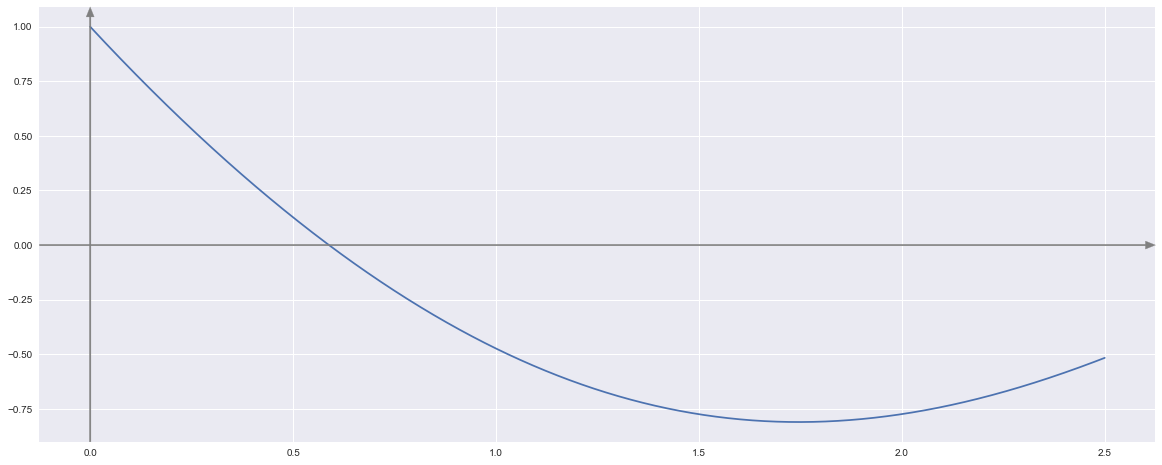

In [4]:
f = lambda x: np.exp(-x) - np.sin(x)
graficar(f, 0, 2.5)

In [5]:
met_secante(f, 0.25, 0.5, 1e-15)

ite 1 : [p_-1=0.25000, p_0 =0.50000] p_1 =0.5785974 | e_abs: 7.859741e-02
ite 2 : [p_0 =0.50000, p_1 =0.57860] p_2 =0.5881967 | e_abs: 9.599272e-03
ite 3 : [p_1 =0.57860, p_2 =0.58820] p_3 =0.5885314 | e_abs: 3.347328e-04
ite 4 : [p_2 =0.58820, p_3 =0.58853] p_4 =0.5885327 | e_abs: 1.329697e-06
ite 5 : [p_3 =0.58853, p_4 =0.58853] p_5 =0.5885327 | e_abs: 1.788626e-10
>>> Solución exacta encontrada después de 5 iteraciones: x->0.588532743981861


0.5885327439818611